In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from compare_wandb import load_full_df, multimsa_pair_plot

In [2]:
RUNS = {
    "fatt": "xuofwjtc",
    "fatt-mlm": "0vw3tzoe",
    "fatt-no-bias": "e75ylc1j",
    "gremlin": "dbuvl02g",
    "gremlin-mlm": "7r0y956y",
}

In [3]:
df = load_full_df(RUNS)

100%|██████████| 748/748 [00:00<00:00, 29931.02it/s]

xuofwjtc has 748 runs



100%|██████████| 748/748 [00:00<00:00, 31646.18it/s]

0vw3tzoe has 748 runs



100%|██████████| 748/748 [00:00<00:00, 32803.63it/s]

e75ylc1j has 748 runs



100%|██████████| 748/748 [00:00<00:00, 33307.56it/s]

dbuvl02g has 748 runs



100%|██████████| 748/748 [00:00<00:00, 30205.06it/s]

7r0y956y has 748 runs



100%|██████████| 748/748 [00:00<00:00, 58007.57it/s]

l37wrnsa has 748 runs



100%|██████████| 748/748 [00:00<00:00, 48711.16it/s]

zd8rc6j7 has 748 runs



100%|██████████| 748/748 [00:00<00:00, 48485.32it/s]

f4mdy8a6 has 748 runs
Shape pre dropping NaNs (5804, 15)
Shape post dropping NaNs (5802, 15)



/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/nickbhat/projects/iclr-2021-factored-attention/compare_wandb.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

# Trend Plots (Fig 3)

## Pr @ L

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


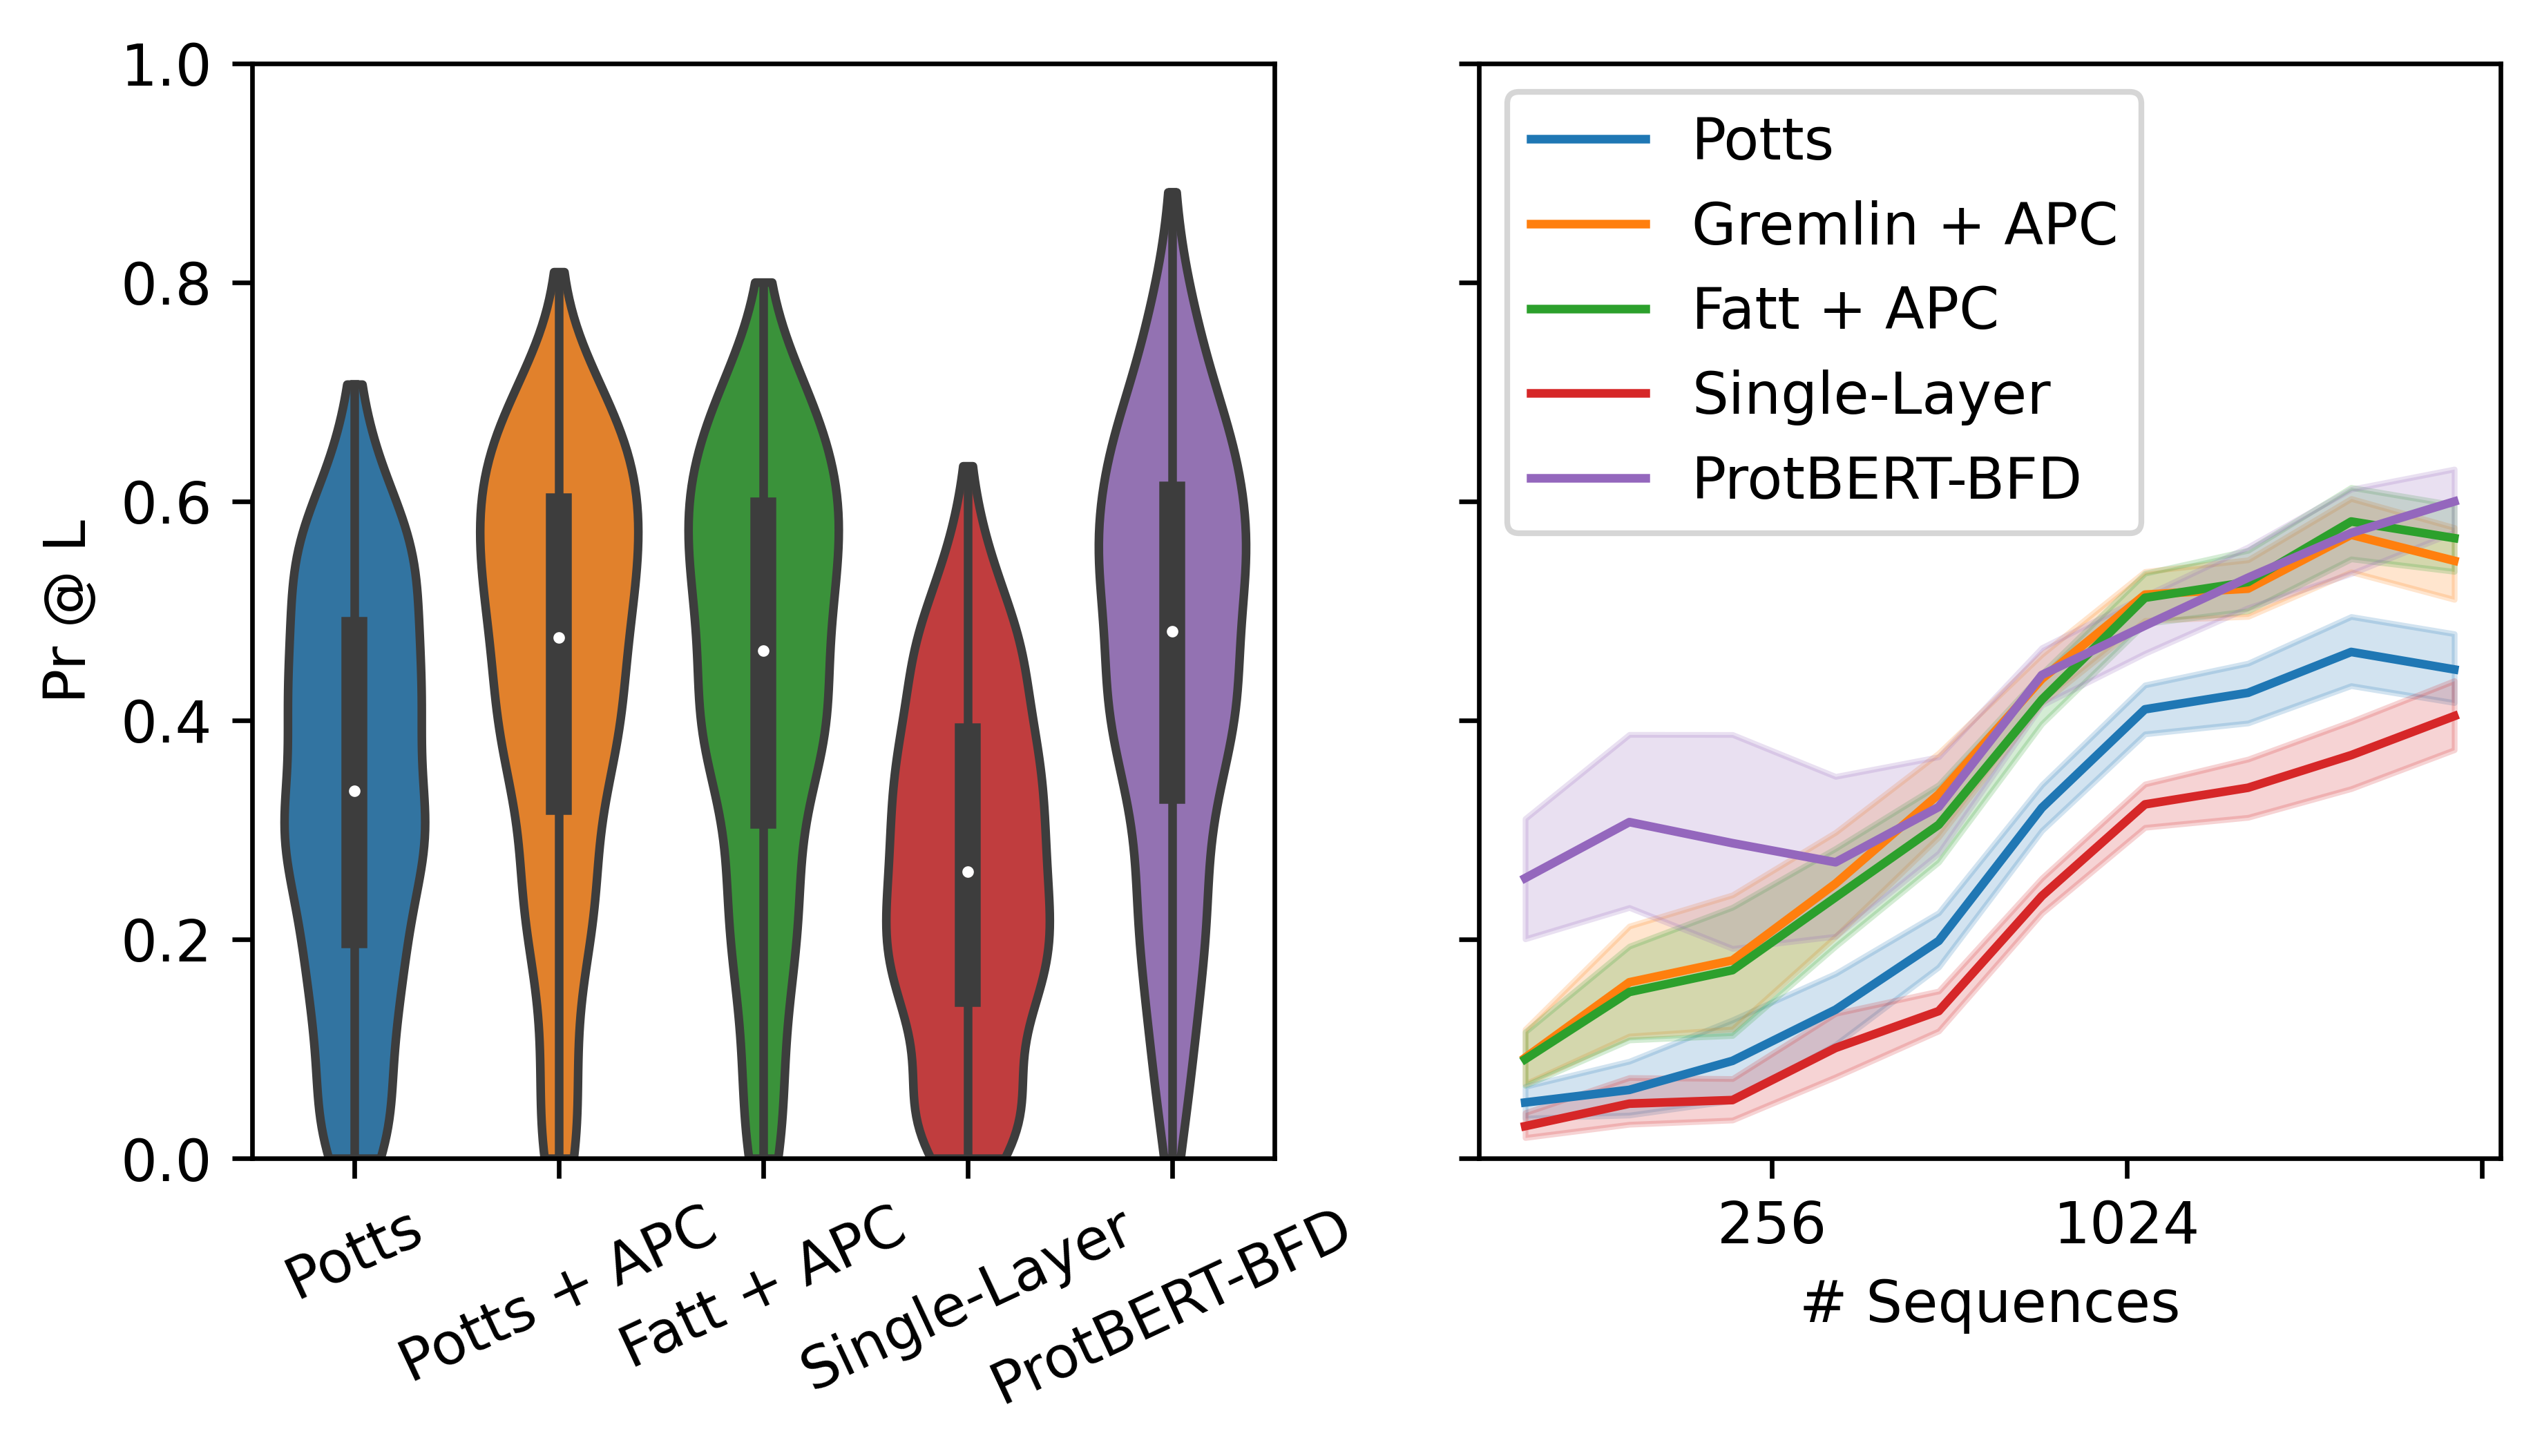

In [8]:
fig, ax = plt.subplots(figsize=(7., 3.5), dpi=600, ncols=2, sharey=True)
sns.violinplot(x="sweep_name", y="pr_at_L", order=["gremlin", "gremlin-apc", "fatt-apc", "transformer", "protbert_bfd"], data=df, cut=0, ax=ax[0])
out, bins = pd.cut(df["log_num_seqs"], bins=10, retbins=True, include_lowest=True, labels=False)
sns.lineplot(x=bins[np.array(out, dtype=np.int32)], y="pr_at_L", hue="sweep_name", hue_order=["gremlin", "gremlin-apc", "fatt-apc", "transformer", "protbert_bfd"], data=df, ax=ax[1])
ax[0].set_xticklabels(["Potts", "Potts + APC", "Fatt + APC", "Single-Layer", "ProtBERT-BFD"], Rotation=25)
ax[0].set_xlabel("")
ax[0].set_ylabel("Pr @ L")
ax[0].set_ylim(0, 1.0)
ax[1].legend(["Potts", "Gremlin + APC", "Fatt + APC", "Single-Layer", "ProtBERT-BFD"])
ax[1].set_xlabel("# Sequences")
#ax[1].set_xticks([8, 10, 12, 14])
ax[1].set_xticklabels(2 ** np.array([6, 8, 10]))
#ax[1].set_xticklabels([256, 1024, 4096, 16384])
#plt.savefig("fig_3_draft.pdf")
plt.show()

## Pr @ L/5

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


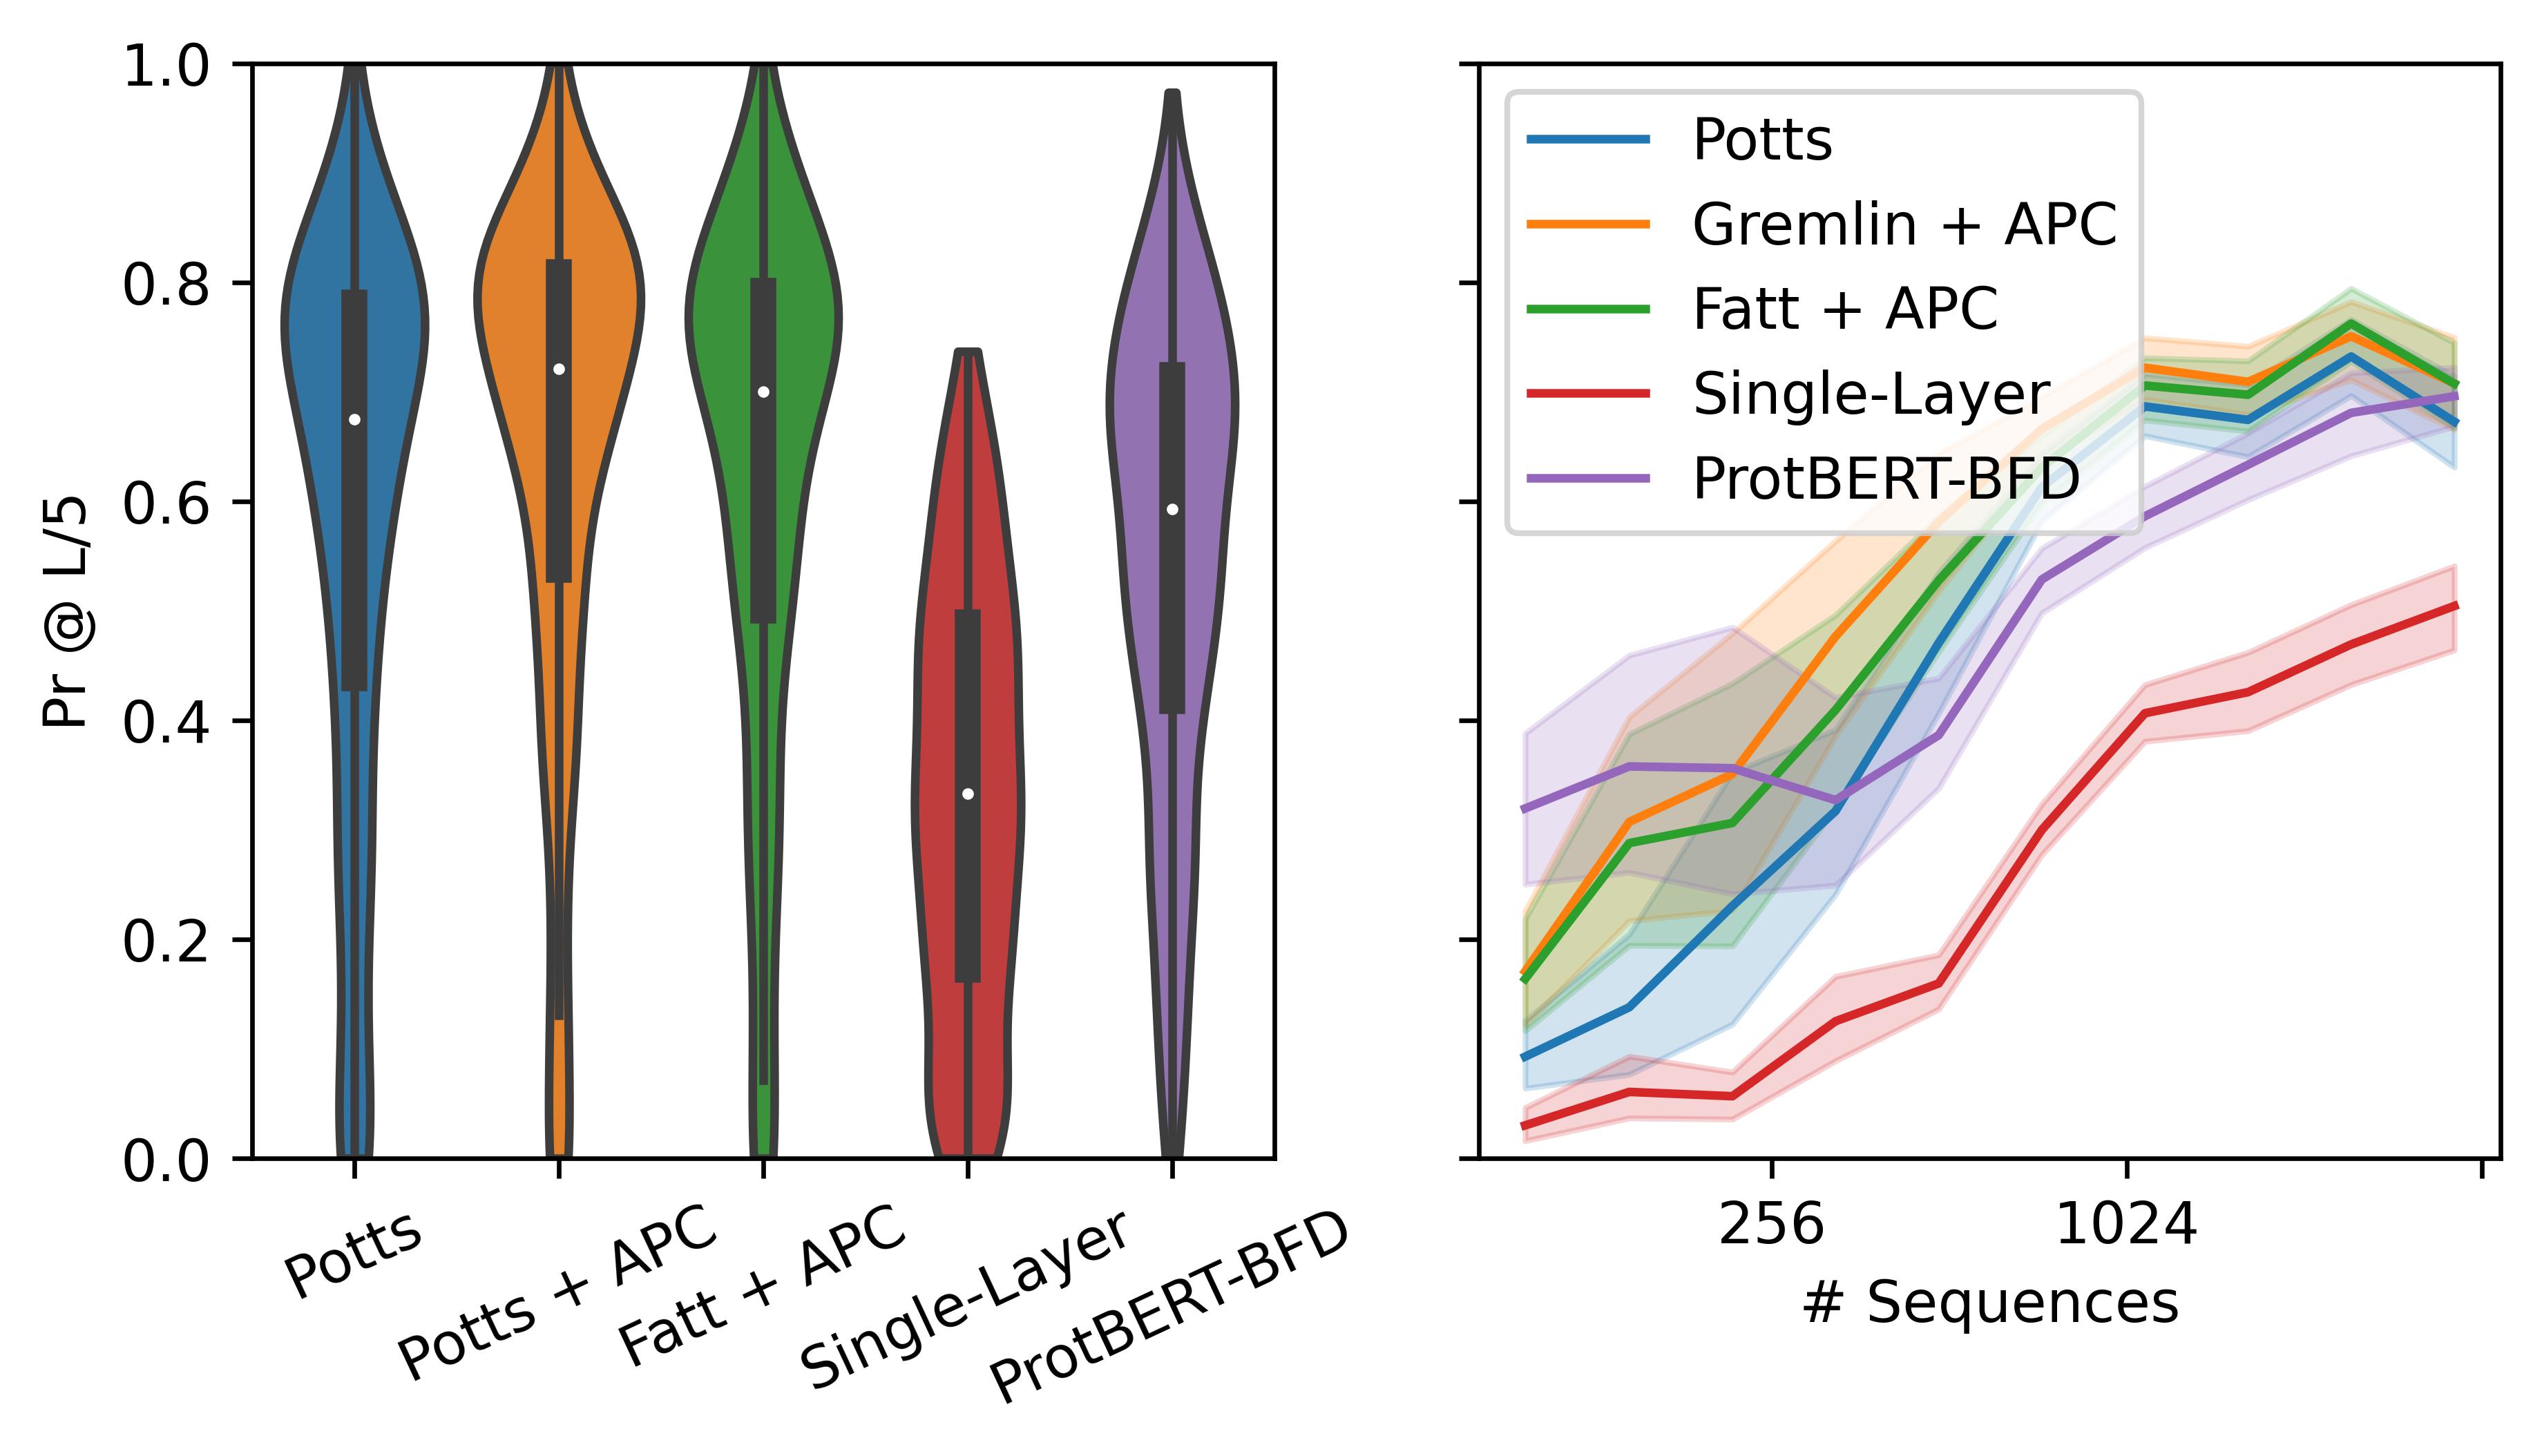

In [6]:
fig, ax = plt.subplots(figsize=(7, 3.5), dpi=600, ncols=2, sharey=True)
sns.violinplot(x="sweep_name", y="pr_at_L_5", order=["gremlin", "gremlin-apc", "fatt-mlm-apc", "transformer", "protbert_bfd"], data=df, cut=0, ax=ax[0])
out, bins = pd.cut(df["log_num_seqs"], bins=10, retbins=True, include_lowest=True, labels=False)
sns.lineplot(x=bins[np.array(out, dtype=np.int32)], y="pr_at_L_5", hue="sweep_name", hue_order=["gremlin", "gremlin-apc", "fatt-mlm-apc", "transformer", "protbert_bfd"], data=df, ax=ax[1])
ax[0].set_xticklabels(["Potts", "Potts + APC", "Fatt + APC", "Single-Layer", "ProtBERT-BFD"], Rotation=25)
ax[0].set_xlabel("")
ax[0].set_ylabel("Pr @ L/5")
ax[0].set_ylim(0, 1.0)
ax[1].legend(["Potts", "Gremlin + APC", "Fatt + APC", "Single-Layer", "ProtBERT-BFD"])
ax[1].set_xlabel("# Sequences")
#ax[1].set_xticks([8, 10, 12, 14])
ax[1].set_xticklabels(2 ** np.array([6, 8, 10]))
#ax[1].set_xticklabels([256, 1024, 4096, 16384])
#plt.savefig("fig_3_draft.pdf")
plt.show()

## AUC

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


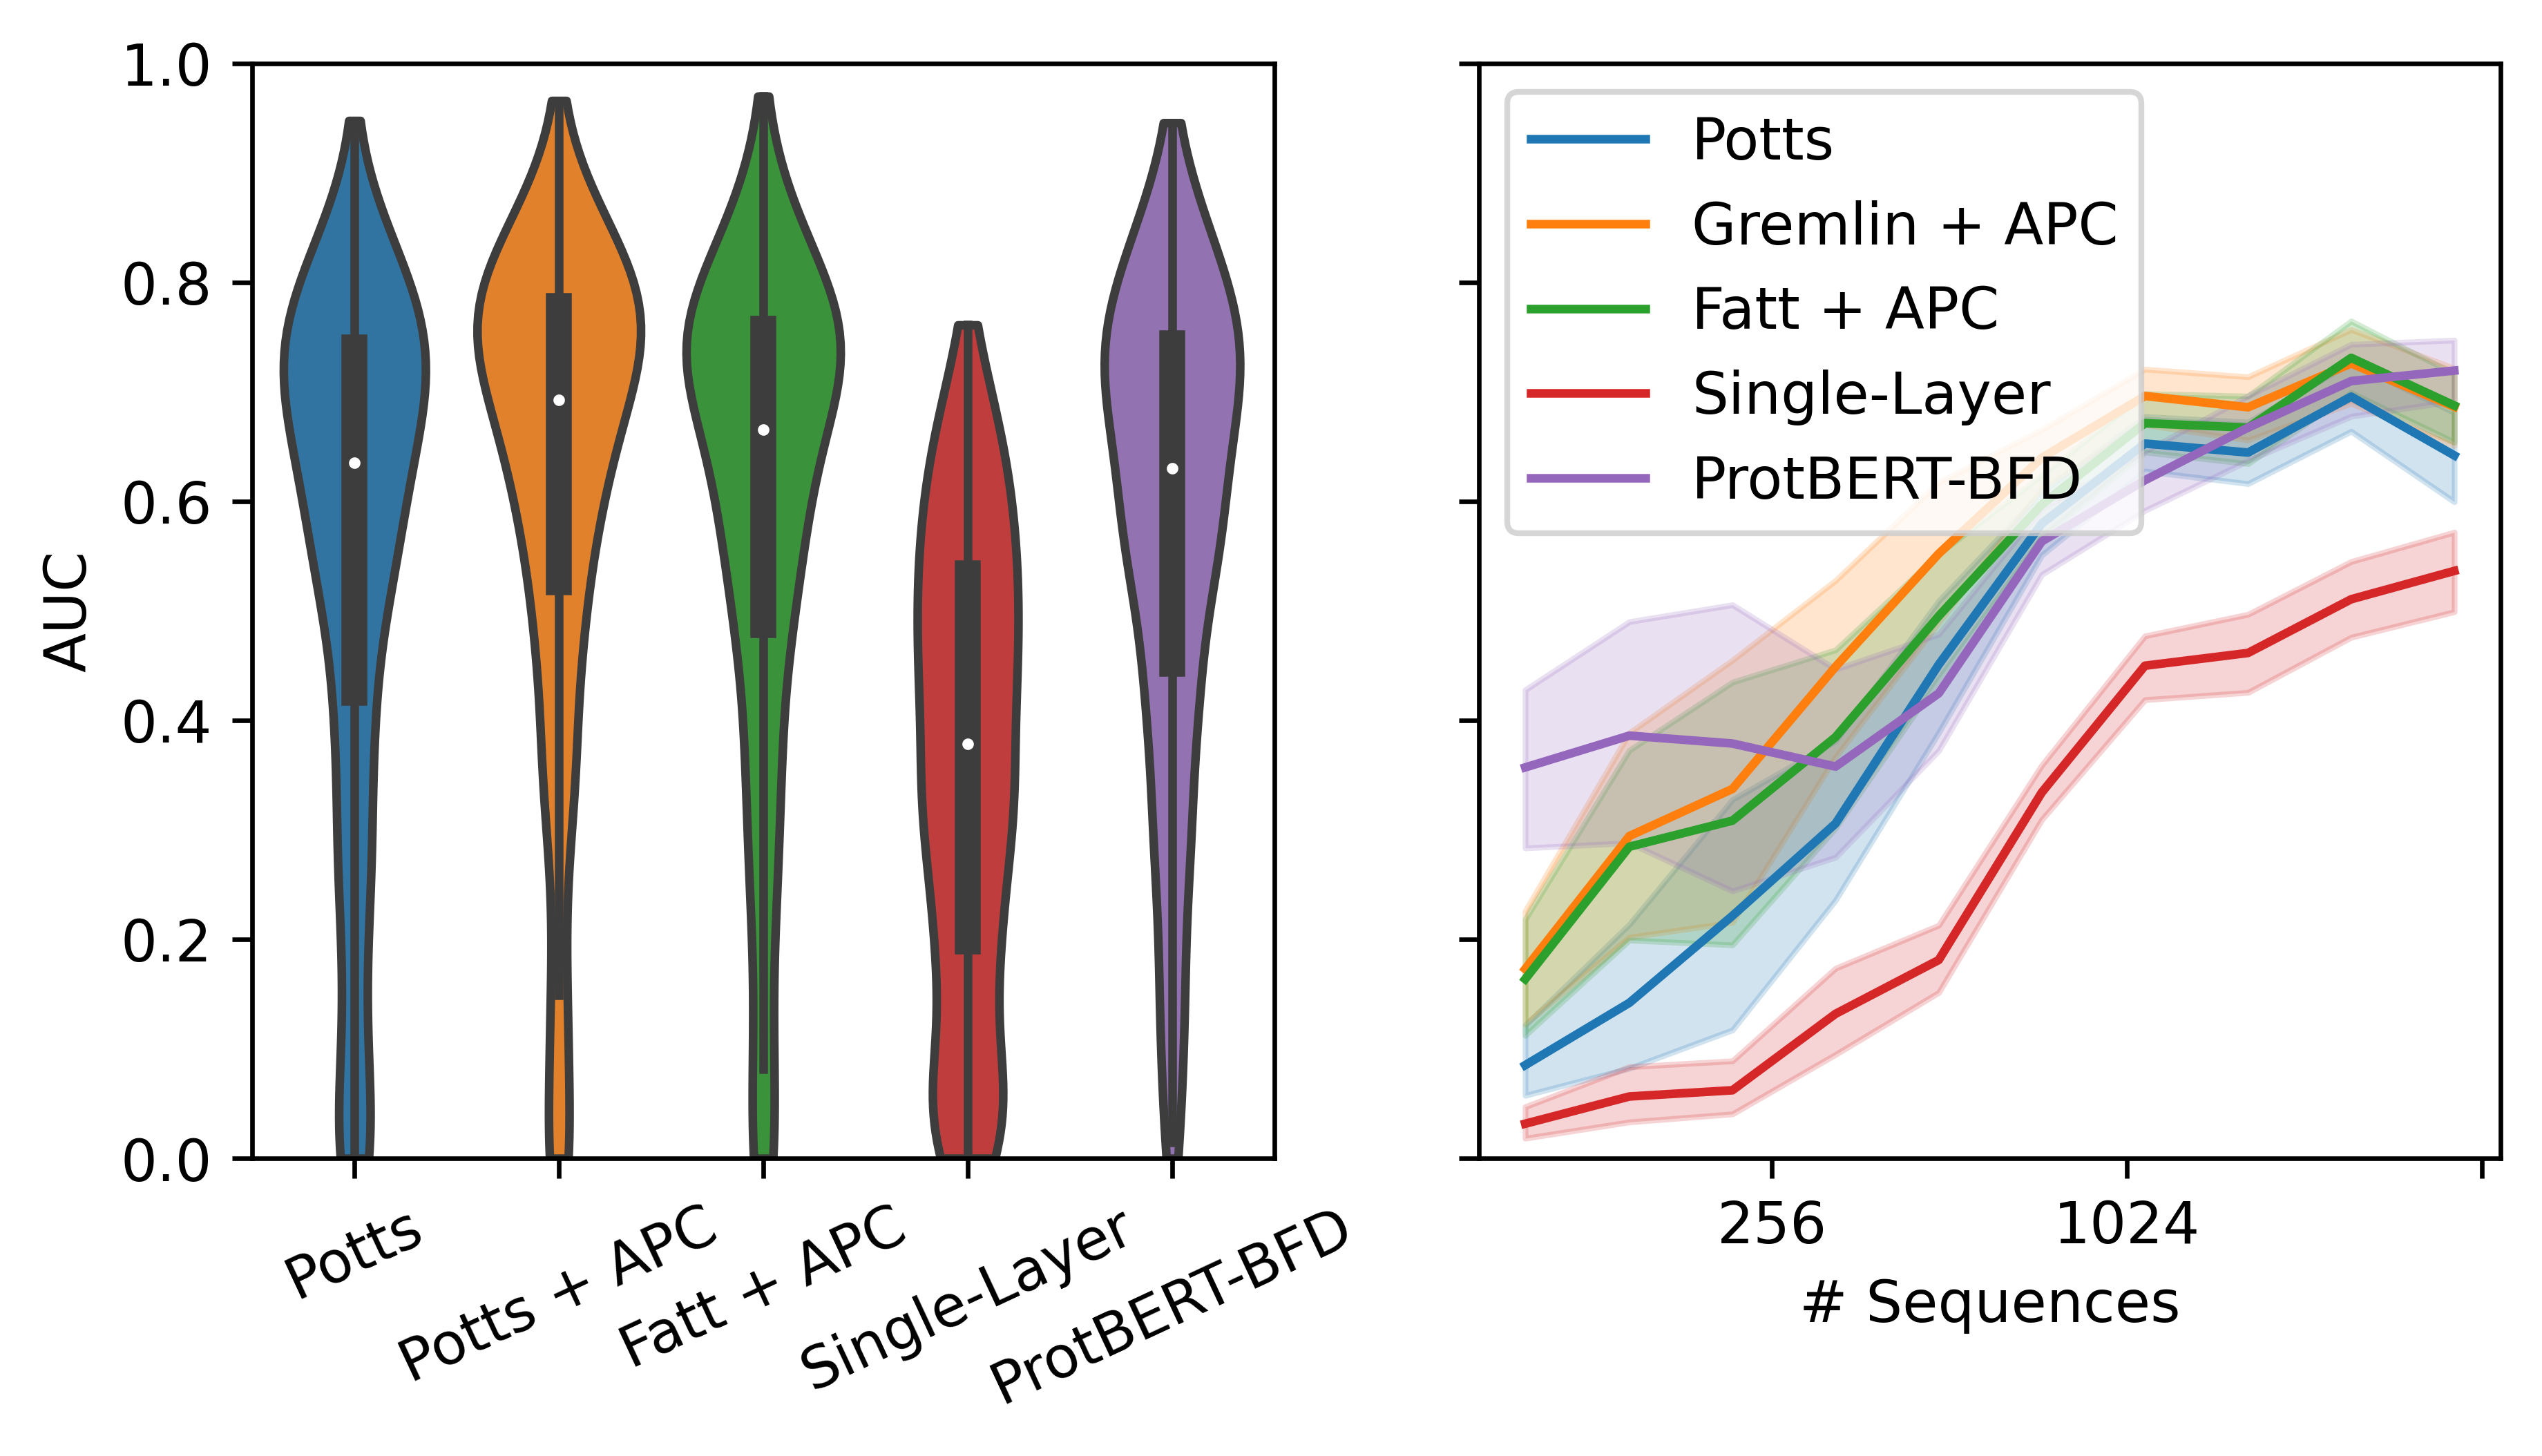

In [7]:
fig, ax = plt.subplots(figsize=(7, 3.5), dpi=600, ncols=2, sharey=True)
sns.violinplot(x="sweep_name", y="auc", order=["gremlin", "gremlin-apc", "fatt-mlm-apc", "transformer", "protbert_bfd"], data=df, cut=0, ax=ax[0])
out, bins = pd.cut(df["log_num_seqs"], bins=10, retbins=True, include_lowest=True, labels=False)
sns.lineplot(x=bins[np.array(out, dtype=np.int32)], y="auc", hue="sweep_name", hue_order=["gremlin", "gremlin-apc", "fatt-mlm-apc", "transformer", "protbert_bfd"], data=df, ax=ax[1])
ax[0].set_xticklabels(["Potts", "Potts + APC", "Fatt + APC", "Single-Layer", "ProtBERT-BFD"], Rotation=25)
ax[0].set_xlabel("")
ax[0].set_ylabel("AUC")
ax[0].set_ylim(0, 1.0)
ax[1].legend(["Potts", "Gremlin + APC", "Fatt + APC", "Single-Layer", "ProtBERT-BFD"])
ax[1].set_xlabel("# Sequences")
#ax[1].set_xticks([8, 10, 12, 14])
ax[1].set_xticklabels(2 ** np.array([6, 8, 10]))
#ax[1].set_xticklabels([256, 1024, 4096, 16384])
#plt.savefig("fig_3_draft.pdf")
plt.show()

# Head Size Effect for Fatt (Fig 4)

# Gremlin MLM vs PL (Fig 5)

comparison families:  742


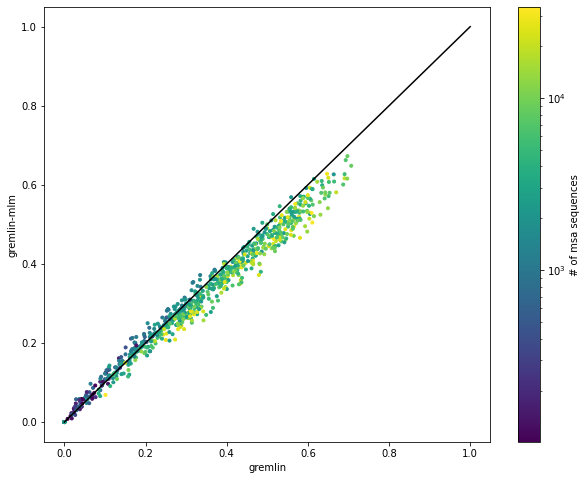

comparison families:  742


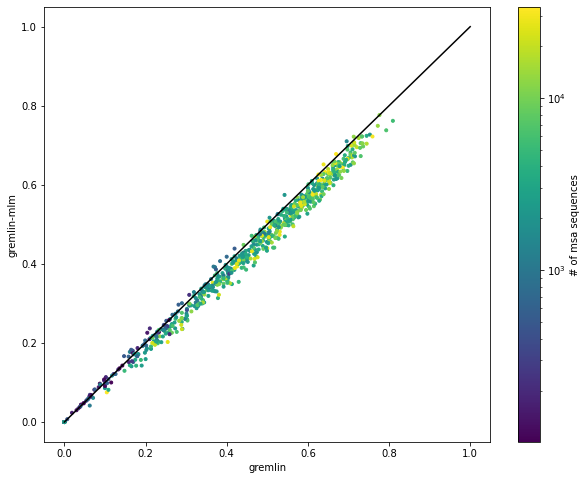

In [47]:
plt.figure(figsize=(10,8))
multimsa_pair_plot(df, "gremlin", "gremlin-mlm", "pr_at_L")
plt.show()

plt.figure(figsize=(10,8))
multimsa_pair_plot(df, "gremlin", "gremlin-mlm", "pr_at_L_apc")
plt.show()

# Effect of APC (Fig 10)

## P @ L

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 1.0)

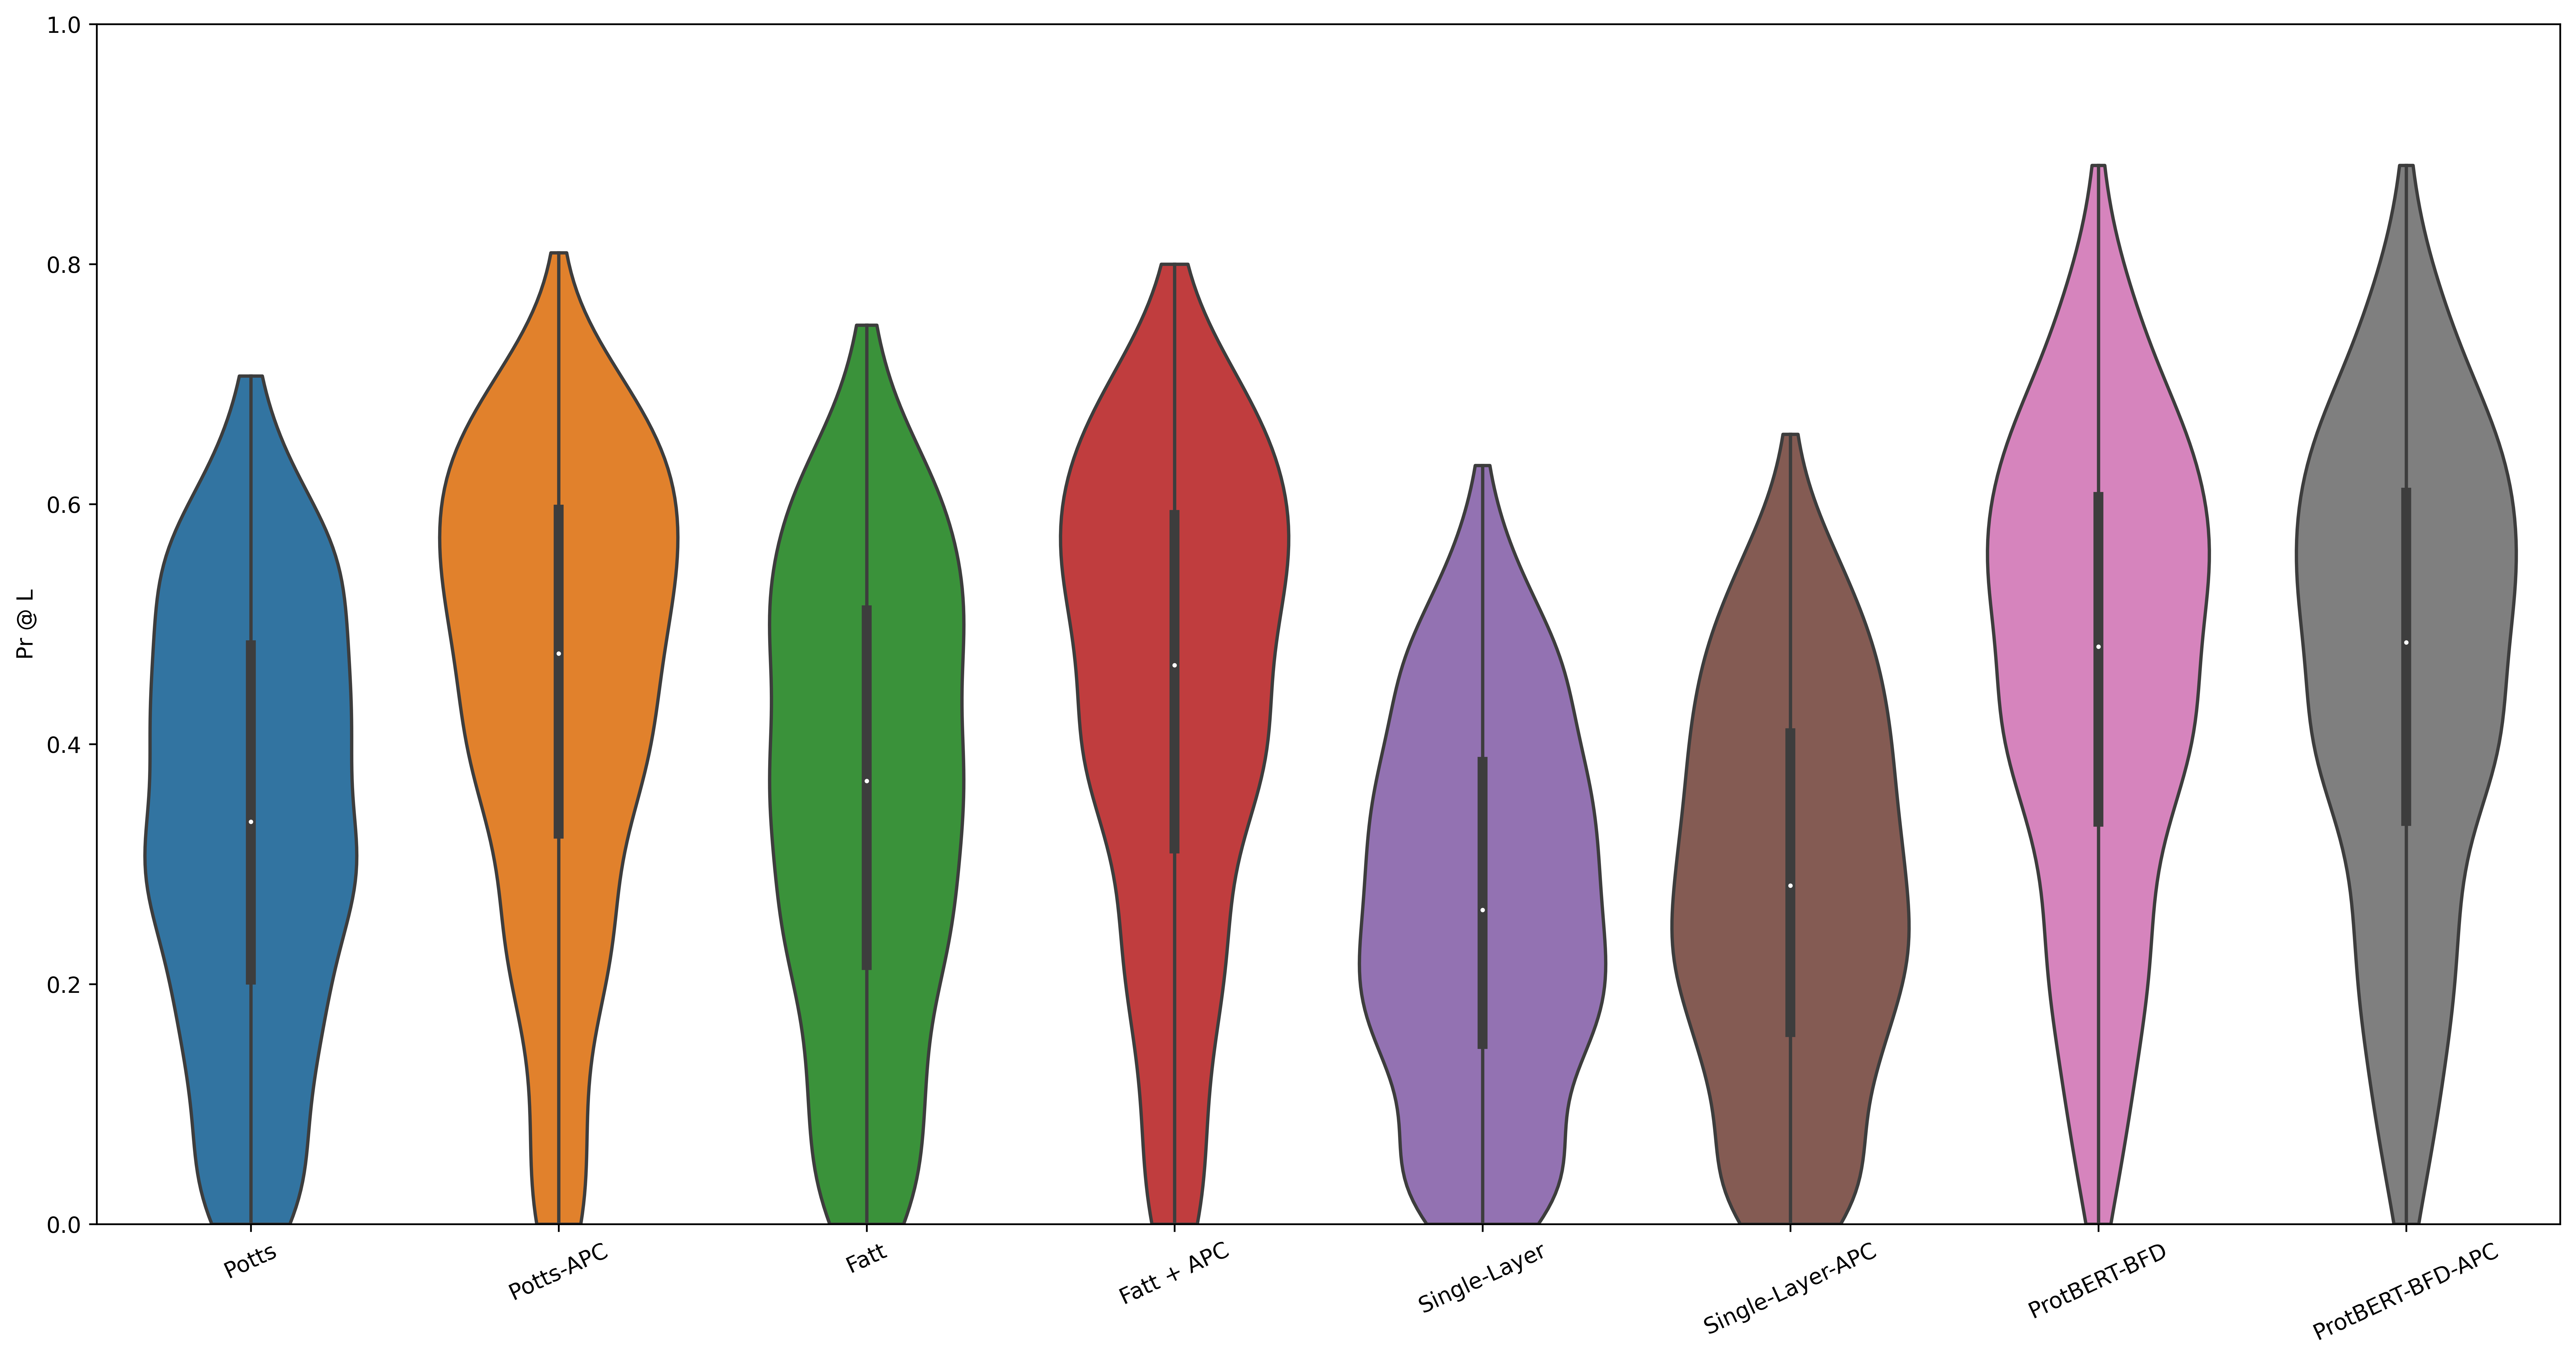

In [58]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
sns.violinplot(x="sweep_name", y="pr_at_L", order=["gremlin", "gremlin-apc", "fatt", "fatt-apc", "transformer", "transformer-apc", "protbert-bfd", "protbert-bfd-apc"], data=df, cut=0)
ax.set_xticklabels(["Potts", "Potts-APC", "Fatt", "Fatt + APC", "Single-Layer", "Single-Layer-APC", "ProtBERT-BFD", "ProtBERT-BFD-APC"], Rotation=25)
plt.xlabel("")
plt.ylabel("Pr @ L")
plt.ylim(0., 1.)

## P @ L/5

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 1.0)

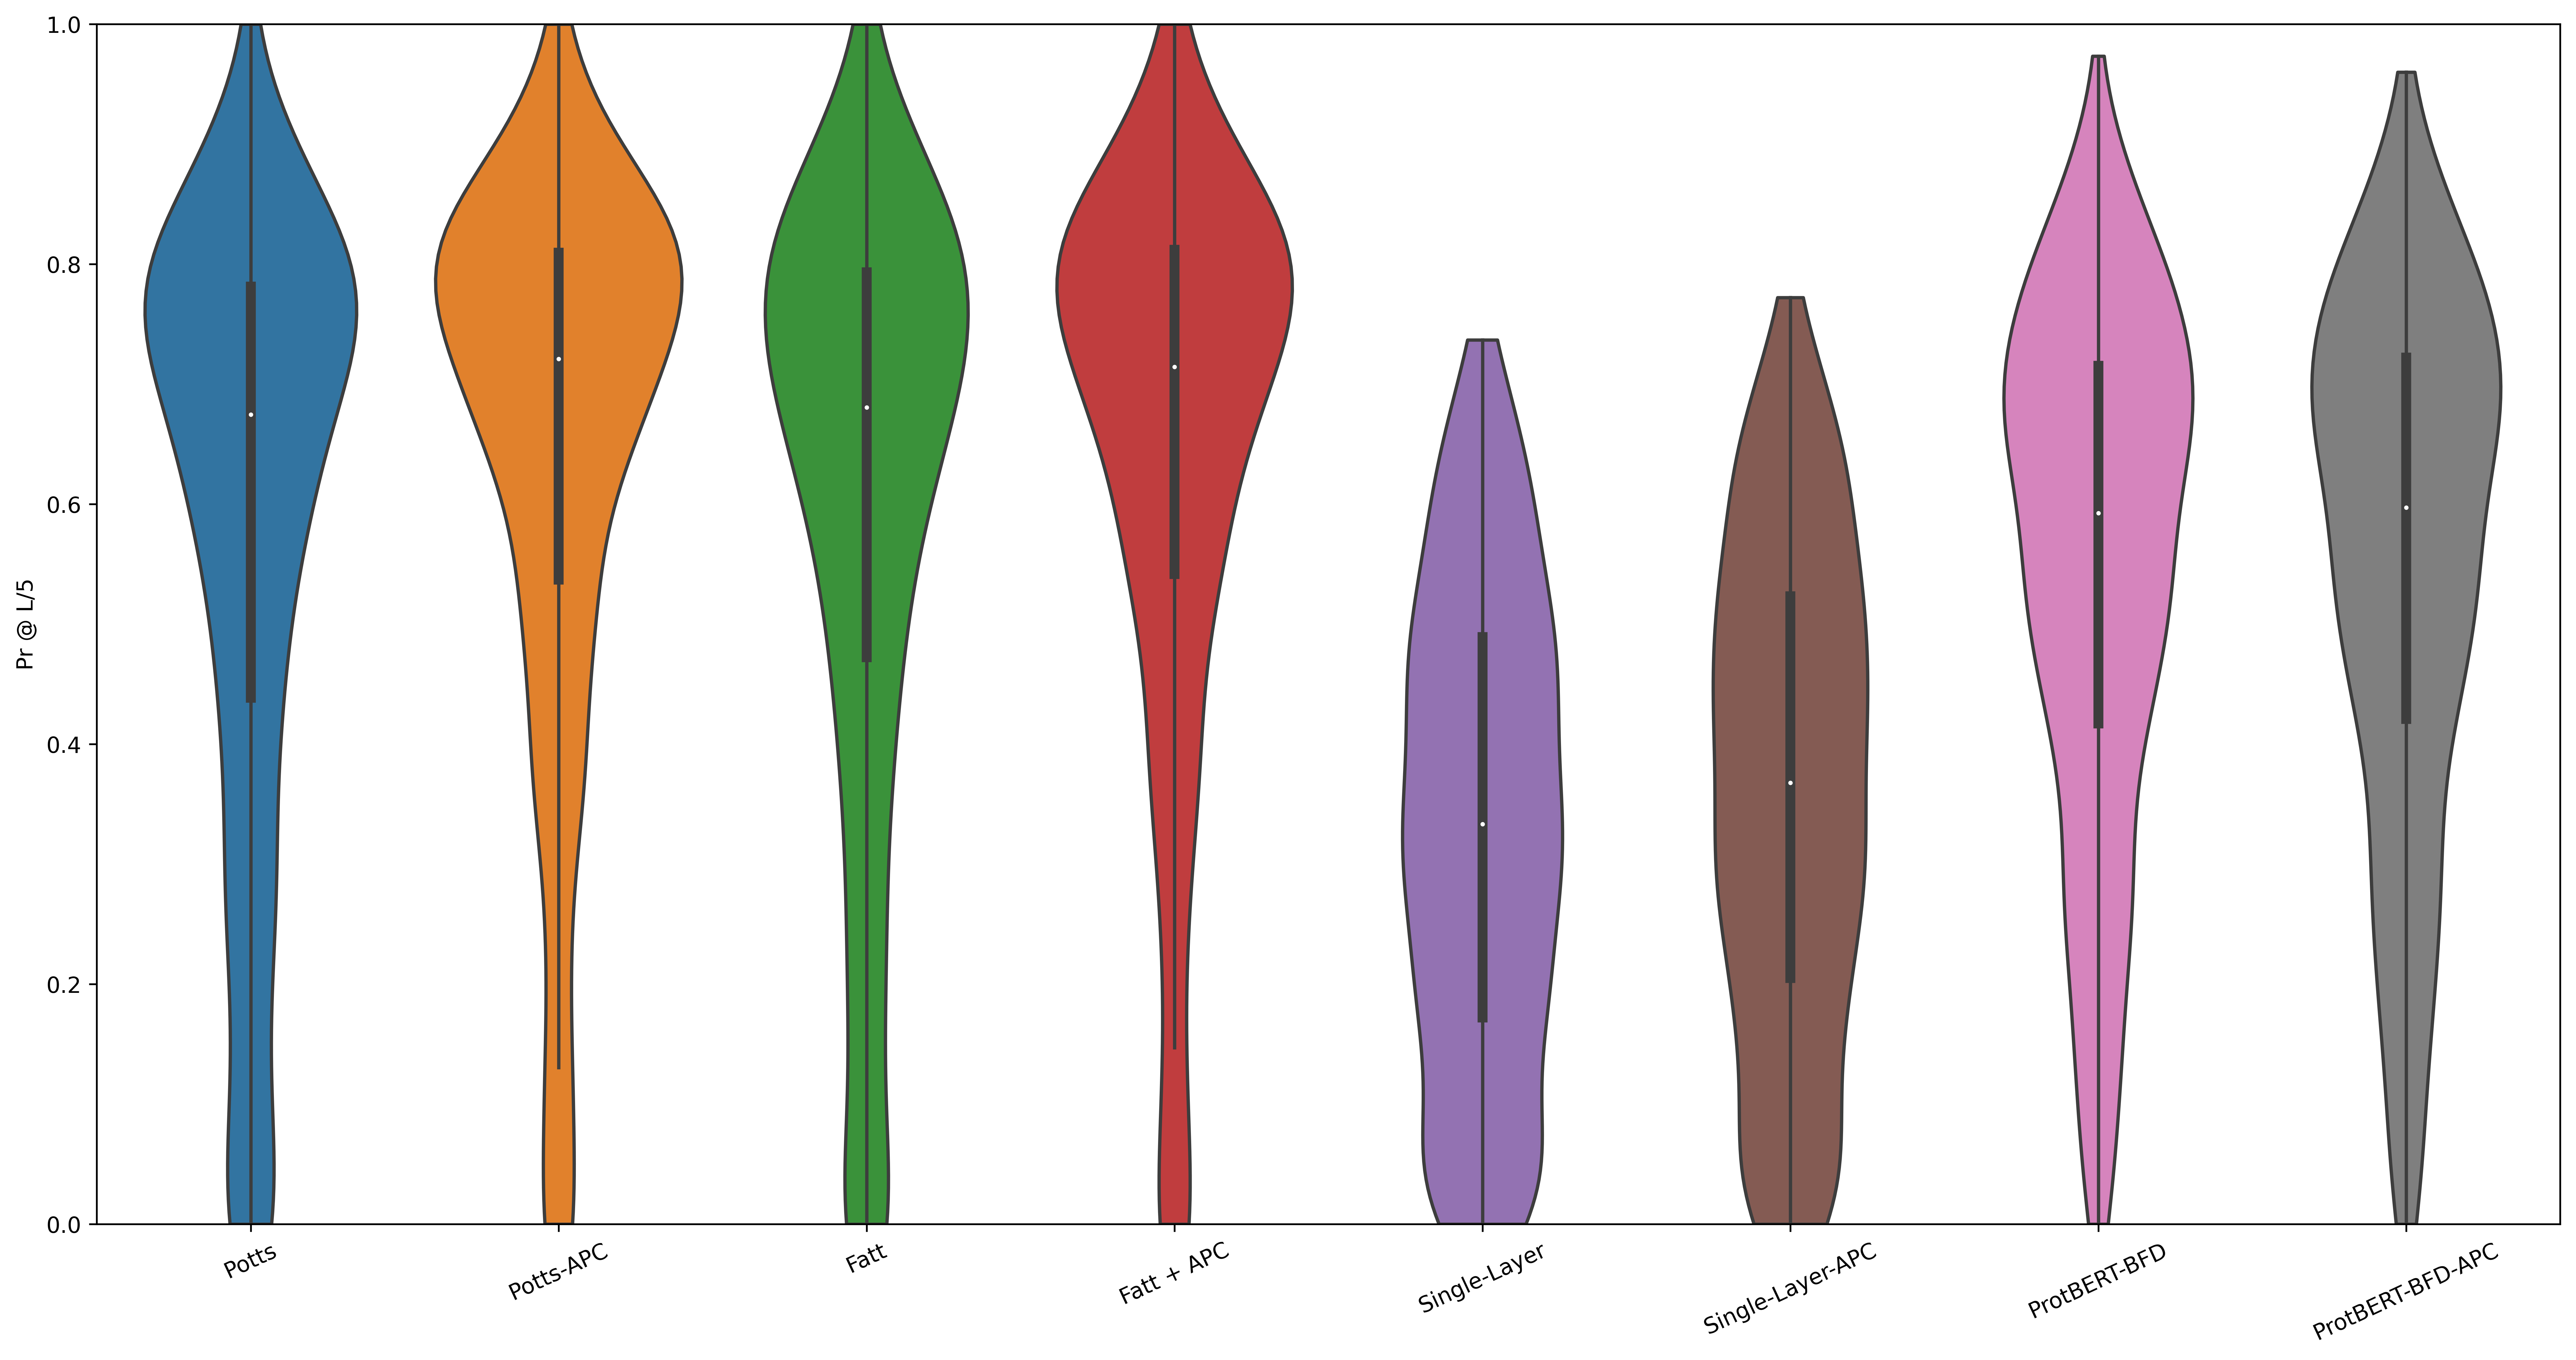

In [59]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
sns.violinplot(x="sweep_name", y="pr_at_L_5", order=["gremlin", "gremlin-apc", "fatt", "fatt-apc", "transformer", "transformer-apc", "protbert-bfd", "protbert-bfd-apc"], data=df, cut=0)
ax.set_xticklabels(["Potts", "Potts-APC","Fatt", "Fatt + APC", "Single-Layer", "Single-Layer-APC", "ProtBERT-BFD", "ProtBERT-BFD-APC"], Rotation=25)
plt.xlabel("")
plt.ylabel("Pr @ L/5")
plt.ylim(0., 1.)

## AUC

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 1.0)

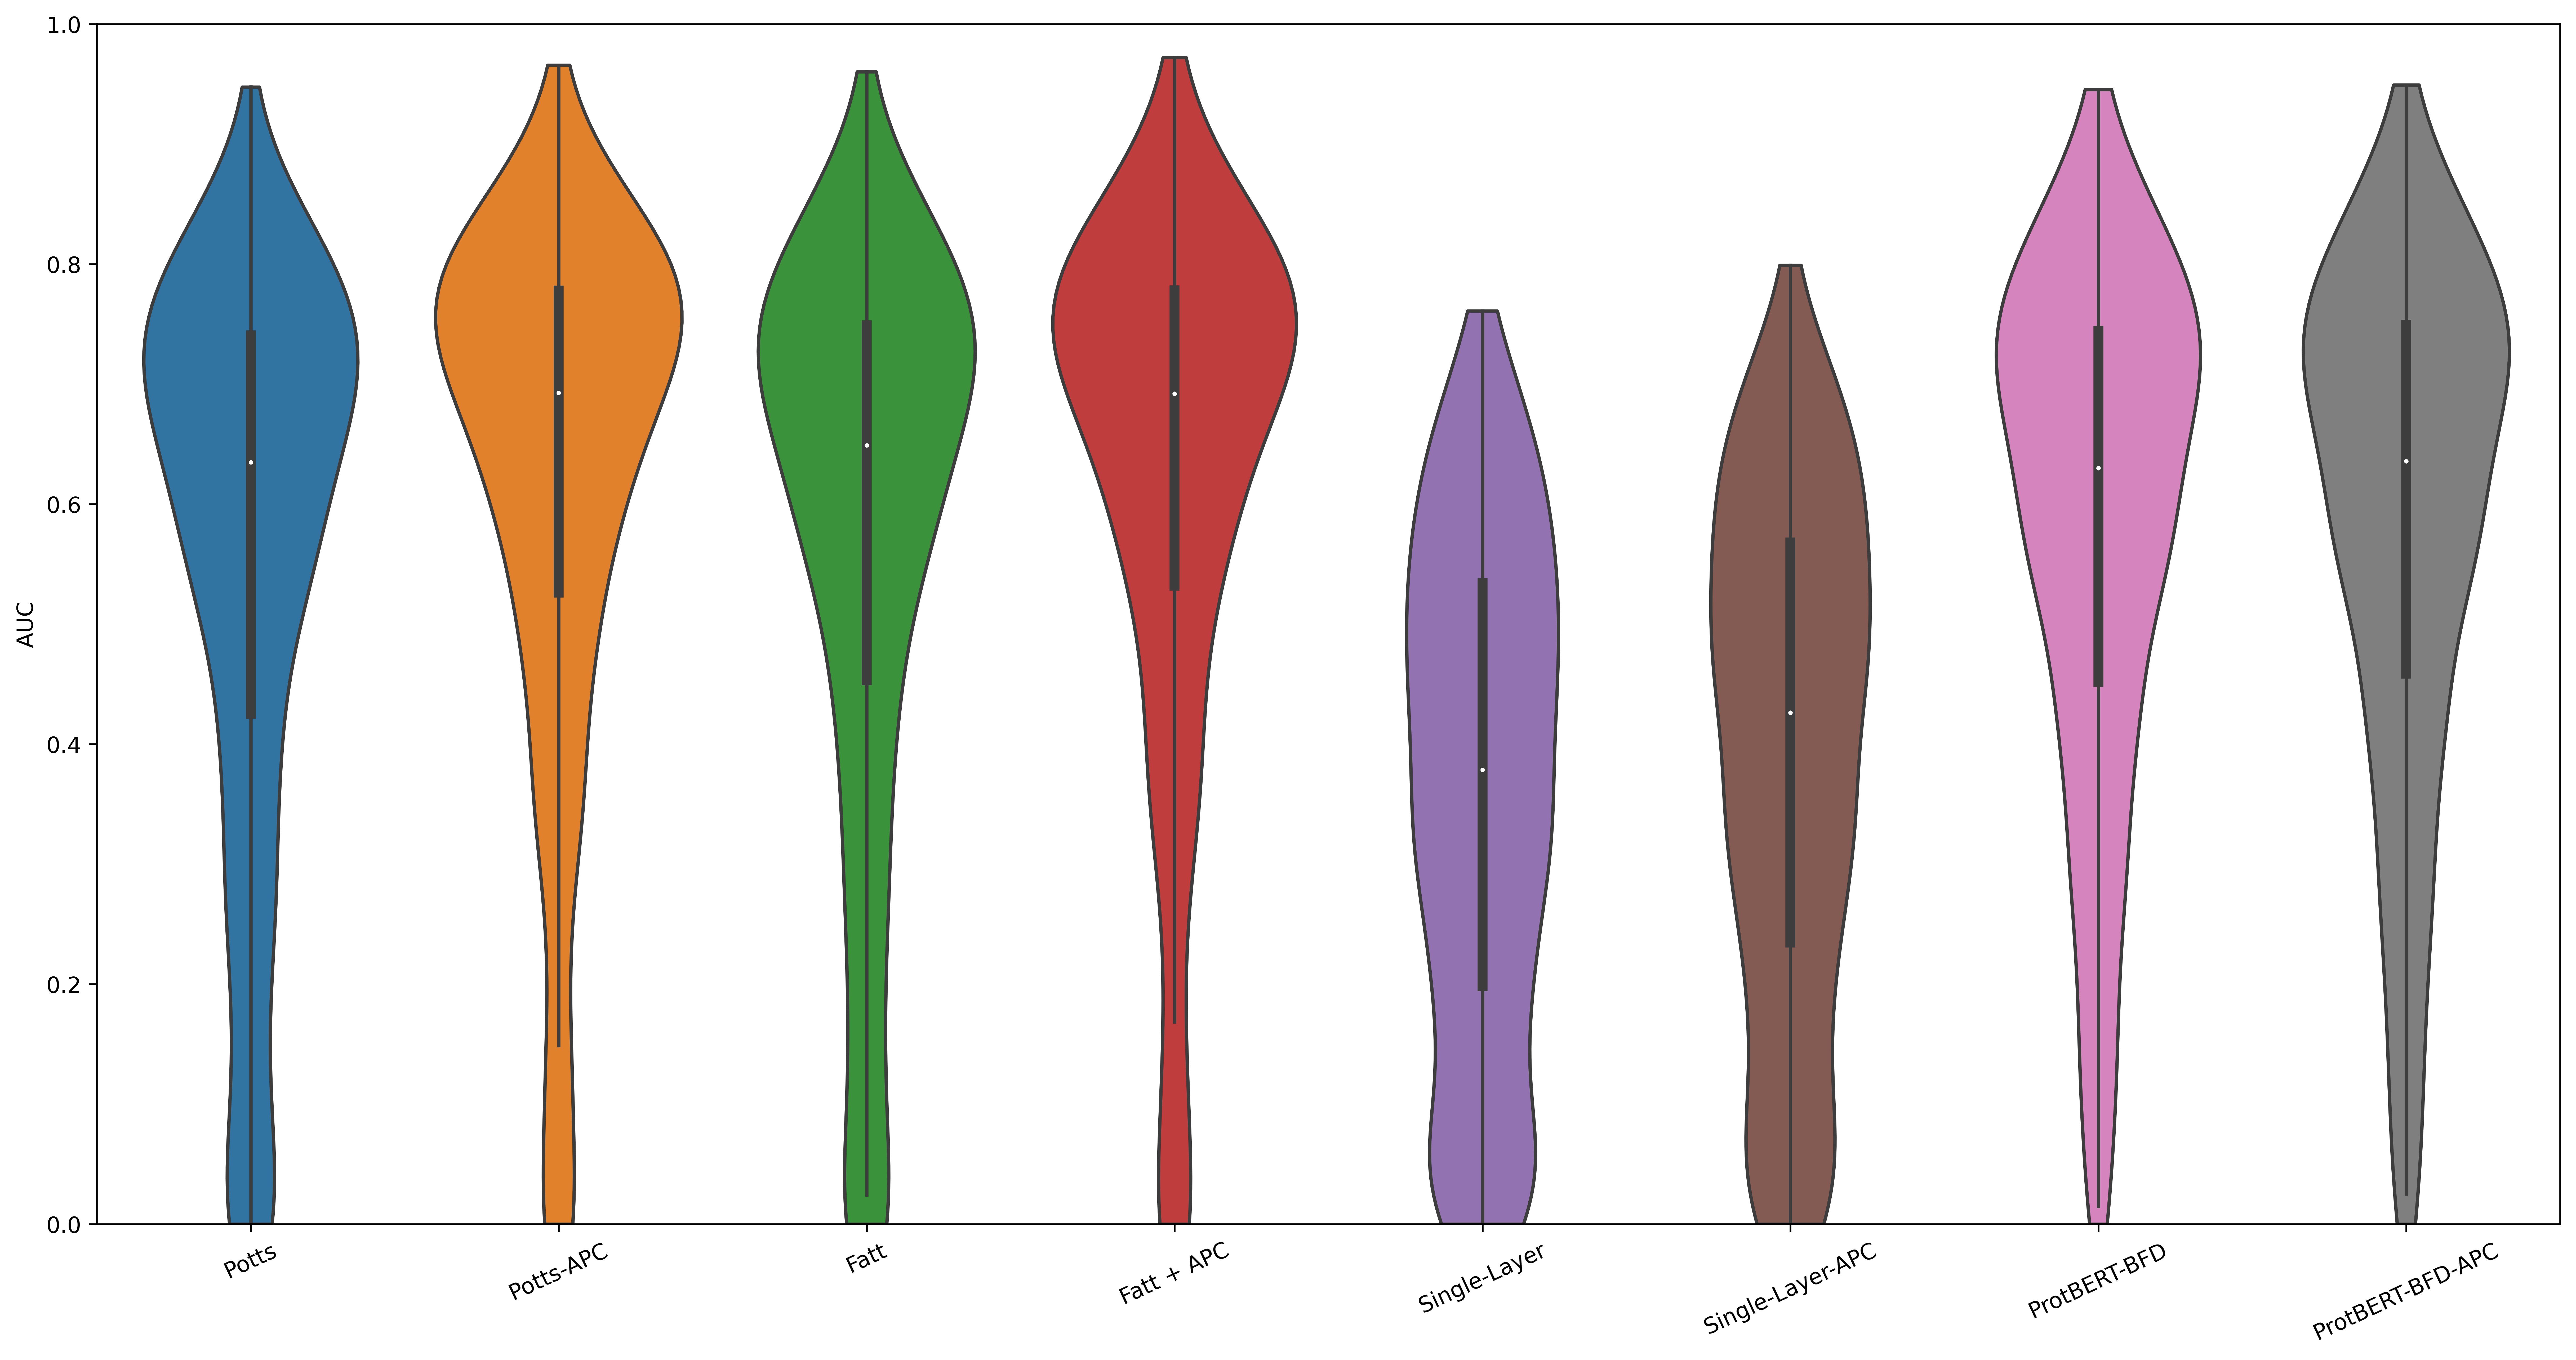

In [57]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
sns.violinplot(x="sweep_name", y="auc", order=["gremlin", "gremlin-apc", "fatt", "fatt-apc", "transformer", "transformer-apc", "protbert-bfd", "protbert-bfd-apc"], data=df, cut=0)
ax.set_xticklabels(["Potts", "Potts-APC", "Fatt", "Fatt + APC", "Single-Layer", "Single-Layer-APC", "ProtBERT-BFD", "ProtBERT-BFD-APC"], Rotation=25)
plt.xlabel("")
plt.ylabel("AUC")
plt.ylim(0., 1.)

# Fatt MLM vs PL(Fig 12)

comparison families:  706


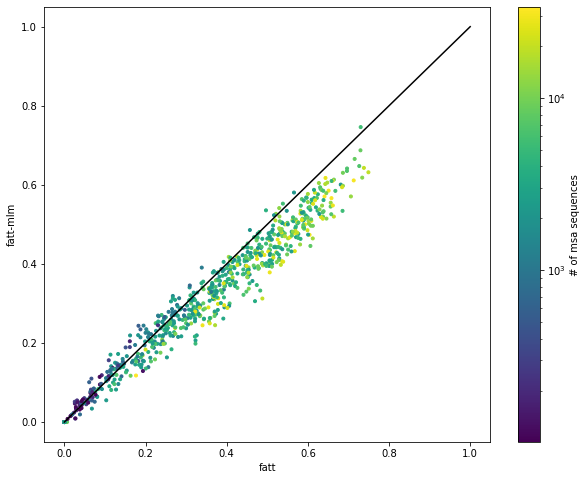

comparison families:  706


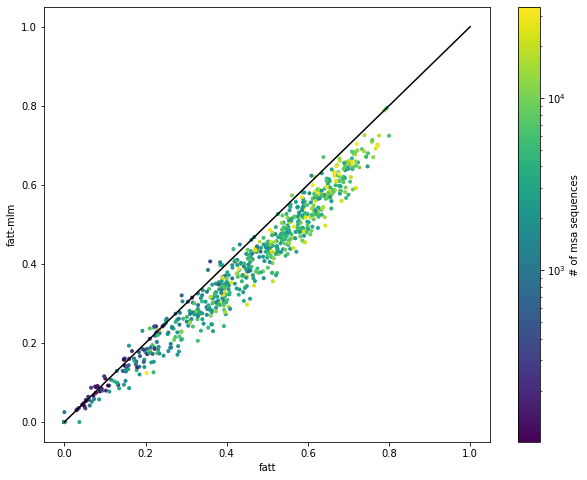

In [48]:
plt.figure(figsize=(10,8))
multimsa_pair_plot(df, "fatt", "fatt-mlm", "pr_at_L")
plt.show()

plt.figure(figsize=(10,8))
multimsa_pair_plot(df, "fatt", "fatt-mlm", "pr_at_L_apc")
plt.show()

# Ablation Studies (Fig 16)

In [8]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
sns.violinplot(x="model", y="auc", hue="use_bias", order=["factored_attention", "transformer"], data=df[df.apc == False], split=True, cut=0)
ax.set_xticklabels(["Factored Attention", "Standard Attention"], Rotation=25)
plt.xlabel("")
plt.ylabel("AUC")
plt.ylim(-0.2, 1.)

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


(-0.2, 1.0)